# Questions 1

## Step 1:

In [76]:
import pandas as pd

## Step 2 & 3

In [79]:
users= pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user',index_col='user_id',sep='|')

## 4

In [81]:
users.groupby('occupation').age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

## 5

In [82]:
def gender_ratio(x):
    if x == 'M':
        return 1
    if x == 'F':
        return 0
users['gender_new'] = users['gender'].apply(gender_ratio)

a = users.groupby('occupation').gender_new.sum()/users.occupation.value_counts()*100
a.sort_values(ascending=False)

doctor           100.000000
engineer          97.014925
technician        96.296296
retired           92.857143
programmer        90.909091
executive         90.625000
scientist         90.322581
entertainment     88.888889
lawyer            83.333333
salesman          75.000000
educator          72.631579
student           69.387755
other             65.714286
marketing         61.538462
writer            57.777778
none              55.555556
administrator     54.430380
artist            53.571429
librarian         43.137255
healthcare        31.250000
homemaker         14.285714
dtype: float64

## 6

In [83]:
users.groupby('occupation').age.agg(['max','min'])

,max,min
occupation,,
administrator,70,21
artist,48,19
doctor,64,28
educator,63,23
engineer,70,22
entertainment,50,15
executive,69,22
healthcare,62,22
homemaker,50,20


## 7

In [85]:
users.groupby(['occupation','gender']).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

## 8

In [86]:
gender_count = users.groupby(['occupation','gender']).agg({'gender':'count'})
occup_count = users.groupby(['occupation']).agg('count')
occup_gender = gender_count.div(occup_count,level='occupation')*100
occup_gender.loc[:,'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2

## Step 1, 2 & 3

In [98]:
import pandas as pd
import numpy as np

In [99]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/jokecamp/FootballData/master/UEFA_European_Championship/Euro%202012/Euro%202012%20stats%20TEAM.csv')

In [100]:
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


## 4

In [101]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

## 5

In [102]:
euro12.Team.sort_values().count()

16

## 6

In [103]:
euro12.shape[1]

35

## 7

In [104]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


## 8

In [105]:
discipline.sort_values(['Yellow Cards','Yellow Cards'],ascending=False)

,Team,Yellow Cards,Red Cards
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
6,Greece,9,1
1,Czech Republic,7,0
9,Poland,7,1
14,Sweden,7,0
4,France,6,0
11,Republic of Ireland,6,1


## 9

In [106]:
discipline['Yellow Cards'].mean()

7.4375

## 10

In [107]:
euro12[euro12.Goals>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


## 11

In [108]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


## 12

In [109]:
euro12.iloc[:,0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


## 13

In [110]:
euro12.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


## 14

In [111]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

## Step 1:

In [ ]:
import numpy as np
import pandas as pd


## Step 2:

In [13]:
first_series = pd.Series(np.random.randint(1, high=5, size=100))
second_series = pd.Series(np.random.randint(1, high=4, size=100))
third_series = pd.Series(np.random.randint(10000, high=30001, size=100))
print (first_series, second_series, third_series)

0     4
1     2
2     2
3     3
4     2
     ..
95    4
96    2
97    4
98    3
99    4
Length: 100, dtype: int64 0     2
1     2
2     1
3     3
4     1
     ..
95    3
96    3
97    1
98    3
99    3
Length: 100, dtype: int64 0     11354
1     22497
2     20670
3     26788
4     28575
      ...  
95    22920
96    27941
97    24234
98    29875
99    21681
Length: 100, dtype: int64


## Step 3:

In [14]:
df_series = pd.concat([first_series, second_series, third_series], axis=1)
df_series.head()

,0,1,2
0,4,2,11354
1,2,2,22497
2,2,1,20670
3,3,3,26788
4,2,1,28575


## Step 4:

In [15]:
df_series.columns = [ "bedrs","bathrs","price_sqr_meter"]
df_series.head()

,bedrs,bathrs,price_sqr_meter
0,4,2,11354
1,2,2,22497
2,2,1,20670
3,3,3,26788
4,2,1,28575


## Step 5:

In [16]:
bigcolumn = df_series['bedrs'].append(df_series['bathrs'].append(df_series['price_sqr_meter']))
bigcolumn

0         4
1         2
2         2
3         3
4         2
      ...  
95    22920
96    27941
97    24234
98    29875
99    21681
Length: 300, dtype: int64

## Step 6. It seems it is going only until index 99. Is it true?

Yes,it is. The index has 100 rows from 0 to 99

## Step 7: 

In [17]:
bigcolumn.reset_index(drop=True)

0          4
1          2
2          2
3          3
4          2
       ...  
295    22920
296    27941
297    24234
298    29875
299    21681
Length: 300, dtype: int64

# Question 4

## Step 1:

In [22]:
import pandas as pd
import numpy as np

## Step 2:

In [23]:
data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", delim_whitespace=True)
data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


## Step 3 & Step 4:

In [24]:
data["Date"]= pd.to_datetime(data[['Yr', 'Mo', 'Dy']]
                .rename(columns={'Yr': 'year',
                                'Mo': 'month',
                                'Dy': 'day'})
               .assign(year=lambda x: x['year']+1900))
data.drop(['Yr', 'Mo', 'Dy'], axis=1, inplace=True)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,Date
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978-12-27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978-12-28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978-12-29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978-12-30


## Step 5:

In [21]:
data = data.set_index('Date')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


## Step 6:

In [22]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

## Step 7:

In [23]:
data = data.dropna()
data.isnull().sum()
data.count()

RPT    6546
VAL    6546
ROS    6546
KIL    6546
SHA    6546
BIR    6546
DUB    6546
CLA    6546
MUL    6546
CLO    6546
BEL    6546
MAL    6546
dtype: int64

## Step 8:

In [24]:
data.mean(axis=1).mean(axis=0)

10.222465245951703

## Step 9: 

In [25]:
loc_stats = pd.DataFrame()
loc_stats["min"] = data.min(axis=0)
loc_stats["max"] = data.max(axis=0)
loc_stats["mean"] = data.mean(axis=0)
loc_stats["std"] = data.std(axis=0)
loc_stats.head()

,min,max,mean,std
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988


## Step 10:

In [26]:
day_stats = pd.DataFrame()
day_stats["min"] = data.min(axis=1)
day_stats["max"] = data.max(axis=1)
day_stats["mean"] = data.mean(axis=1)
day_stats["std"] = data.std(axis=1)
day_stats.head()

,min,max,mean,std
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237


## Step 11:

In [29]:
data = data.reset_index() 
January_data = data[data['Date'].dt.month == 1]
January_data = January_data.median(axis = 0)

January_data

<ipython-input-29-f4806c47bd4a>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  January_data = January_data.median(axis = 0)


level_0    3261.00
index      3261.00
RPT          14.37
VAL          12.58
ROS          12.87
KIL           6.58
SHA          11.38
BIR           8.08
DUB          11.58
CLA           9.38
MUL           9.33
CLO          10.00
BEL          14.04
MAL          17.75
dtype: float64

## Step 12: 

In [30]:
data.groupby(data['Date'].dt.year).sum()

,level_0,index,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,,,
1961,57630,57630,4150.58,3470.45,3836.17,2327.79,3652.53,2589.83,3275.31,2952.87,2914.46,3298.16,4512.33,4619.65
1962,188421,188421,4443.47,3674.61,4240.60,2521.09,3870.60,2684.35,3997.61,3196.39,3017.47,3509.16,4700.82,5198.84
1963,322660,322660,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,457317,457317,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,589475,589475,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,722700,722700,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,855925,855925,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,992043,992043,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,1122740,1122740,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


## Step 13: 

In [25]:
monthly_data = data
monthly_data.groupby([monthly_data['Date'].dt.year.rename('year'),monthly_data['Date'].dt.month.rename('month')]).sum()

RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
year month                                                                   
1961 1      445.24  359.65  416.38  239.84  321.11  266.23  346.73  277.36   
     2      455.54  419.31  389.92  249.23  387.86  306.25  332.94  331.69   
     3      326.70  350.19  333.34  218.52  325.79  274.87  298.97  304.72   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      305.69  265.50  335.36  177.16  294.20  203.82  228.12  253.49   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  
year month                                  
1961 1      281.66  313.33  430.31  455.80  
     2      331.00  356.00  520.33  431.53  
     3      298.53  348.81  508.74  471.60  
     4      220.27  217.11  334.42  308.35  
     5      249.22  263.48  368.91  372.36  
...            ...     ...     ...     ...  
1978 8      224.48  171.64  324.47  373.68  
     9      302.08  268.17  470.41  581.74  
     10     257.23  255.56  427.08  531.65  
     11     321.04  320.28  522.14  621.69  
     12     329.12  341.89  429.65  662.52  

[216 rows x 12 columns]

## Step 14: 

In [28]:
weekly_data = data
weekly_data.groupby([weekly_data['Date'].dt.year.rename('year'),weekly_data['Date'].dt.month.rename('month'), weekly_data['Date'].dt.week.rename('week')]).sum()

<ipython-input-28-16505b99cdc6>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  weekly_data.groupby([weekly_data['Date'].dt.year.rename('year'),weekly_data['Date'].dt.month.rename('month'), weekly_data['Date'].dt.week.rename('week')]).sum()


RPT     VAL     ROS    KIL     SHA     BIR     DUB  \
year month week                                                          
1961 1     1      94.79   68.92   73.41  44.92   66.32   45.05   77.43   
           2      87.28   62.77   83.71  32.41   51.46   35.51   52.75   
           3      92.43   69.04   90.88  44.30   53.80   51.92   64.80   
           4     119.28  112.99  127.58  89.04  122.03  103.80  108.70   
           5      36.42   30.97   27.63  19.88   27.50   20.08   29.38   
...                 ...     ...     ...    ...     ...     ...     ...   
1978 12    48     56.20   50.34   56.08  29.50   44.17   41.79   51.33   
           49    145.18  134.33  119.24  68.44  107.01   89.42  101.06   
           50    117.31  102.85  104.91  48.42   79.78   50.91   71.46   
           51     78.09   56.06   92.21  28.03   54.78   44.03   54.59   
           52    104.66   82.61  112.25  45.55   67.62   60.34   95.96   

                    CLA     MUL     CLO     BEL     MAL  
year month week                                          
1961 1     1      39.70   59.04   59.48   87.37   92.67  
           2      47.74   39.99   53.00   77.88   77.17  
           3      55.13   50.02   56.87   68.75   80.04  
           4     106.12  101.36  109.48  146.51  157.71  
           5      18.42   20.42   21.92   31.30   33.17  
...                 ...     ...     ...     ...     ...  
1978 12    48     38.84   41.71   46.54   48.76   71.40  
           49     87.42   97.09   98.58  129.62  161.43  
           50     55.77   64.18   59.96   77.72  108.94  
           51     60.67   50.06   56.51   82.92  132.84  
           52     73.34   76.08   80.30   90.63  187.91  

[1124 rows x 12 columns]

## Step 15:

In [31]:
data = weekly_data.groupby([weekly_data['Date'].dt.year.rename('Year'),weekly_data['Date'].dt.week.rename('Week')]).sum()
mean = pd.Series(data.head(52).mean(axis=1))
minimum = pd.Series(data.head(52).min(axis=1))
maximum = pd.Series(data.head(52).max(axis=1))
sd = pd.Series(data.head(52).std(axis=1))
statistics = pd.DataFrame({'Min':minimum, 'Max':maximum, 'Mean':mean, 'Std Deviation':sd})
statistics

<ipython-input-31-545fd206eded>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data = weekly_data.groupby([weekly_data['Date'].dt.year.rename('Year'),weekly_data['Date'].dt.week.rename('Week')]).sum()


Min     Max        Mean  Std Deviation
Year Week                                          
1961 1     39.70   94.79   67.425000      18.665854
     2     32.41   87.28   58.472500      19.037546
     3     44.30   92.43   64.831667      15.929948
     4     89.04  157.71  117.050000      19.379127
     5     57.73  117.79   82.602500      19.651171
     6     75.42  152.83  111.240833      22.031887
     7     60.50  148.17   95.247500      22.975869
     8     59.67  114.13   88.230000      16.550263
     9     54.84  124.90   79.417500      18.261704
     10    48.17  116.91   73.506667      19.789498
     11    49.59  135.45   82.294167      23.242226
     12    46.54  126.94   73.240000      21.503822
     13    43.80   97.30   70.397500      14.528849
     14    41.71   95.25   65.886667      16.798883
     15    34.63   66.38   47.919167      12.626817
     16    54.38   95.34   71.026667      13.271604
     17    33.61   70.82   52.115000      13.048908
     18    69.67  122.84   92.148333      15.562041
     19    37.07   72.95   55.750833      10.714129
     20    29.81   84.30   51.822500      16.773771
     21    22.49   81.88   49.933333      17.113453
     22    44.17   95.18   64.712500      15.169920
     23    36.50   85.75   59.213333      14.958301
     24    45.64  107.46   71.216667      18.737534
     25    38.35  121.87   70.465833      24.459895
     26    45.55  101.75   64.837500      15.215322
     27    50.54  111.91   73.070000      17.310881
     28    58.89  116.76   81.663333      17.387127
     29    19.01   58.91   37.456667      12.083577
     30    40.09   96.33   66.017500      15.953680
     31    43.67   96.32   66.127500      14.698140
     32    35.55   76.54   55.953333      12.862969
     33    60.20  109.25   87.293333      15.405967
     34    49.76  115.40   84.432500      18.544842
     35    39.50   95.65   59.061667      16.105509
     36    39.80   77.24   57.307500      13.063209
     37    73.10  139.15  101.575833      21.412518
     38    29.11   77.13   49.091667      14.411473
     39    58.59  113.46   81.450833      19.681967
     40    36.84   79.87   56.239167      15.042864
     41    46.05  106.82   67.890000      18.637243
     42    75.05  165.49  108.357500      24.567914
     43    56.61  128.83   88.034167      23.011550
     44    52.79  134.37   81.290000      22.777712
     45    29.54   76.01   52.410833      17.614695
     46    31.51  118.92   53.529167      24.744003
     47    34.79   89.13   60.280000      16.131285
     48    43.72  103.08   68.283333      19.070403
     49    60.37  121.54   92.017500      20.334799
     50    60.88  105.79   88.921667      14.774988
     51    38.62  110.30   65.210000      22.223507
     52    47.48  123.80   78.870000      25.444300

# Question 5

## Step 1 

In [43]:
import pandas as pd
import numpy as np

## Step 2 & 3

In [47]:
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter="\t")

In [48]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


## Step 5:

In [49]:
len(chipo.index)

4622

## Step 6:

In [51]:
chipo.shape[1]

5

## Step 7

In [52]:
for column_name in chipo.columns:
    print(column_name)

order_id
quantity
item_name
choice_description
item_price


## Step 8

In [53]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

## Step 9

In [54]:
print("most-ordered item:", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "index"])

most-ordered item: Chicken Bowl


## Step 10

In [55]:
no_of_orders = chipo.item_name.value_counts()
no_of_orders[0]

726

## Step 11

In [56]:
print("most-ordered item:", pd.DataFrame(chipo["choice_description"].value_counts()).reset_index().loc[0, "index"])

most-ordered item: [Diet Coke]


## Step 12 

In [57]:
chipo.quantity.sum()

4972

## Step 13

In [58]:
temp = chipo.copy()
temp['item_price'] = temp['item_price'].str[1:]
temp.astype({'item_price':'float64'}).dtypes
temp1 = chipo.copy()
temp1['item_price'] = temp1['item_price'].apply(lambda x: float(x[1:]))
temp1.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [59]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

## Step 14

In [60]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo['revenue_per_order'] = chipo['quantity'] * chipo['item_price']
revenue = chipo['revenue_per_order'].sum()
revenue

39237.02

## Step 15

In [61]:
chipo['order_id'].nunique()

1834

## 16

In [62]:
chipo.groupby("order_id")["revenue_per_order"].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue_per_order, Length: 1834, dtype: float64

## 17

In [63]:
chipo.item_name.value_counts().count()

50

# Question 6

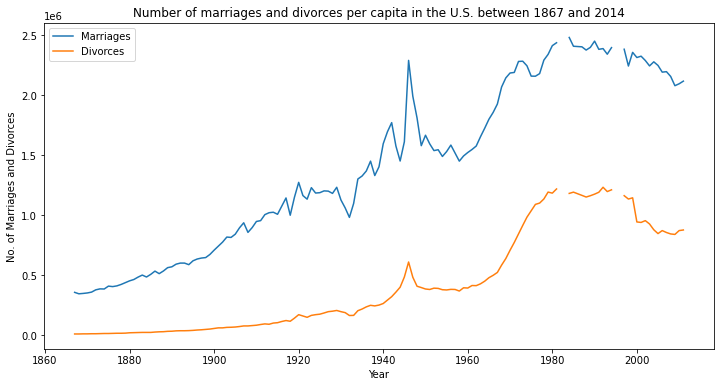

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(marriage_data.Year, marriage_data['Marriages'], label='Marriages')
plt.plot(marriage_data.Year, marriage_data['Divorces'], label='Divorces')
plt.title("Number of marriages and divorces per capita in the U.S. between 1867 and 2014")
plt.xlabel("Year")
plt.ylabel("No. of Marriages and Divorces");
plt.legend();

# Question 7

Text(0, 0.5, 'No. of Marriages and Divroces')

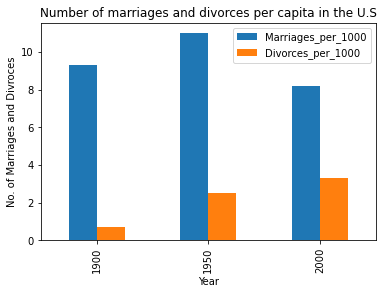

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

bar_chart = marriage_data[(marriage_data.Year == 1900) | (marriage_data.Year == 1950) | (marriage_data.Year == 2000)]
bar_chart = bar_chart.drop(columns = ['Marriages', 'Divorces', 'Population'])
bar_chart = bar_chart.set_index('Year')
bar_chart.plot.bar()
plt.title('Number of marriages and divorces per capita in the U.S')
plt.xlabel('Year')
plt.ylabel('No. of Marriages and Divroces')

# Question 8

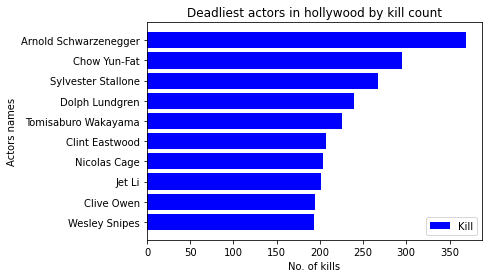

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('actor_kill_counts.csv')
data = data.sort_values(by="Count")

plt.barh(data['Actor'], data['Count'],  color='blue', label='Kill')
plt.xlabel('No. of kills')
plt.ylabel('Actors names')
plt.title('Deadliest actors in hollywood by kill count')
plt.legend()
plt.show()

# Question 9

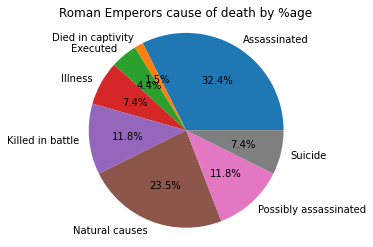

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('roman-emperor-reigns.csv')

pie_chart = data.groupby('Cause_of_Death').count()[['Emperor']]
emperor = pd.Series(pie_chart['Emperor'])
cause_death = pd.Series(pie_chart.index)
fig, ax = plt.subplots()
ax.pie(emperor, labels=cause_death,autopct='%1.1f%%')
ax.axis('equal')
plt.title('Roman Emperors cause of death by %age')
plt.show()

# Question 10

Text(0, 0.5, 'Computer Science Doctorates Awarded (US)')

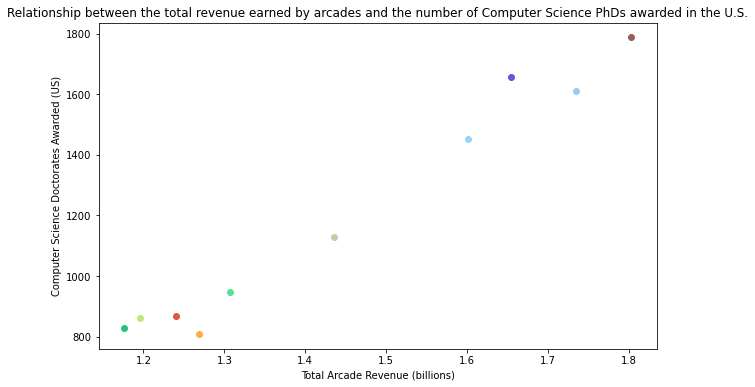

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


revenue_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
colors = {2000:'#C4E57D',2001:'#2AC280', 2002:'#FFAE39',2003:'#DC5B3B',2004:'#52E397', 2005:'#C5CBA3',2006:'#9CD5F6',2007:'#6E50D9', 2008:'#9A5E59',2009:'#9BC8F5'}
fig, ax = plt.subplots(figsize=(10,6))
for i in range (len(revenue_data['Total Arcade Revenue (billions)'])):
    ax.scatter(revenue_data['Total Arcade Revenue (billions)'][i],revenue_data['Computer Science Doctorates Awarded (US)'][i], color = colors[revenue_data['Year'][i]])
ax.set_title('Relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S.')
ax.set_xlabel('Total Arcade Revenue (billions)')
ax.set_ylabel('Computer Science Doctorates Awarded (US)')